In [1]:
%load_ext autoreload
%autoreload 2

# Preprocesamiento y contextualización

## Lectura

Información de archivos

Data extraida de https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE

In [12]:
import os 
directory = '../Stock Exchange'
filefull = 'data_indexes.xlsx'
filepath = os.path.join(directory, filefull)

Explorar primeras lineas del archivo

In [13]:
from utils.read import explore_excel
explore_excel(filepath, lines=4)

Sheet: orjinal data
Row 0:  ,TL BASED,USD BASED,imkb_x,,,,,,
Row 1:  date,ISE,ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
Row 2:  39818.0,0.035753708,0.038376187,-0.004679315,0.002193419,0.003894376,0.0,0.031190229,0.012698039,0.028524462
Row 3:  39819.0,0.025425873,0.031812743,0.007786738,0.008455341,0.012865611,0.004162452,0.01891958,0.011340652,0.008772644




Leer informacion

In [40]:
import pandas as pd
data = pd.read_excel(filepath, header=1)
data.dtypes
data = data.set_index('date')
data.head()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
date,,,,,,,,,
2009-01-05,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
2009-01-06,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2009-01-07,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
2009-01-08,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
2009-01-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


In [15]:
data.describe()

,ISE,ISE.1,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,0.001629,0.001552,0.000643,0.000721,0.000510,0.000308,0.000935,0.000471,0.000936
std,0.016264,0.021122,0.014093,0.014557,0.012656,0.014850,0.015751,0.012990,0.010501
min,-0.062208,-0.084716,-0.054262,-0.052331,-0.054816,-0.050448,-0.053849,-0.048817,-0.038564
25%,-0.006669,-0.009753,-0.004675,-0.006212,-0.005808,-0.007407,-0.007215,-0.005952,-0.004911
50%,0.002189,0.002643,0.000876,0.000887,0.000409,0.000000,0.000279,0.000196,0.001077
75%,0.010584,0.013809,0.006706,0.008224,0.007428,0.007882,0.008881,0.007792,0.006423
max,0.068952,0.100621,0.068366,0.058951,0.050323,0.061229,0.063792,0.067042,0.047805


Estos datos corresponden a los retornos diarios desde Jun 5, 2009 a Feb 22, 2011 para los siguientes índices:

- **ISE100**: Istanbul stock exchange national 100 index
- **SP**: Standard & poor’s 500 return index
- **DAX**: Stock market return index of Germany
- **FTSE**: Stock market return index of UK
- **NIK**: Stock market return index of Japan
- **BVSP**: Stock market return index of Brazil
- **EU**: MSCI European index
- **EM**: MSCI emerging markets index

## Relación lineal entre retornos

### ISE vs SP

Ver [documentación](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) de la utilidad `LinearRegression` de `scikit`.

In [16]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

Fit:

In [17]:
xindex = 'ISE'
yindex = 'SP'
X = data[[xindex]].values
y = data[yindex].values

In [18]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercepto y pendiente:

In [22]:
b = reg.intercept_
b

2.2995492984174471e-05

In [23]:
m = reg.coef_[0]
m

0.38081664940612781

Coeficiente de determinación (ver [referencia]()):

In [24]:
r2 = reg.score(X, y)
r2

0.19315084123786508

Visualización:

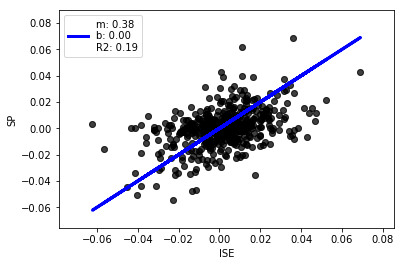

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='black', alpha=0.5)
plt.plot(X, X, color='blue', linewidth=3, label='m: {:.2f}\nb: {:.2f}\nR2: {:.2f}'.format(m, b, r2))
plt.legend(loc='best')
plt.xlabel(xindex)
plt.ylabel(yindex)
plt.show()

### DAX vs EU

Regresión:

In [27]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
xindex = 'DAX'
yindex = 'EU'
X = data[[xindex]].values
y = data[yindex].values
reg.fit(X, y)
b = reg.intercept_
print('b:', b)
m = reg.coef_[0]
print('m:', m)
r2 = reg.score(X, y)
print('R2:', r2)

b: -0.000131707199838
m: 0.835585666963
R2: 0.876831941837


Visualización:

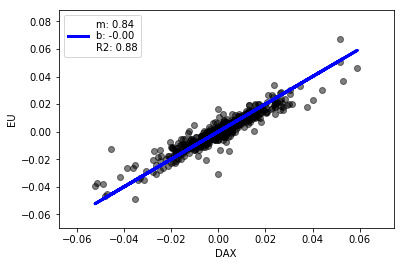

In [315]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='black', alpha=0.5)
plt.plot(X, X, color='blue', linewidth=3, label='m: {:.2f}\nb: {:.2f}\nR2: {:.2f}'.format(m, b, r2))
plt.legend(loc='best')
plt.xlabel(xindex)
plt.ylabel(yindex)
plt.show()

## Relaciones lineales entre pares de indices

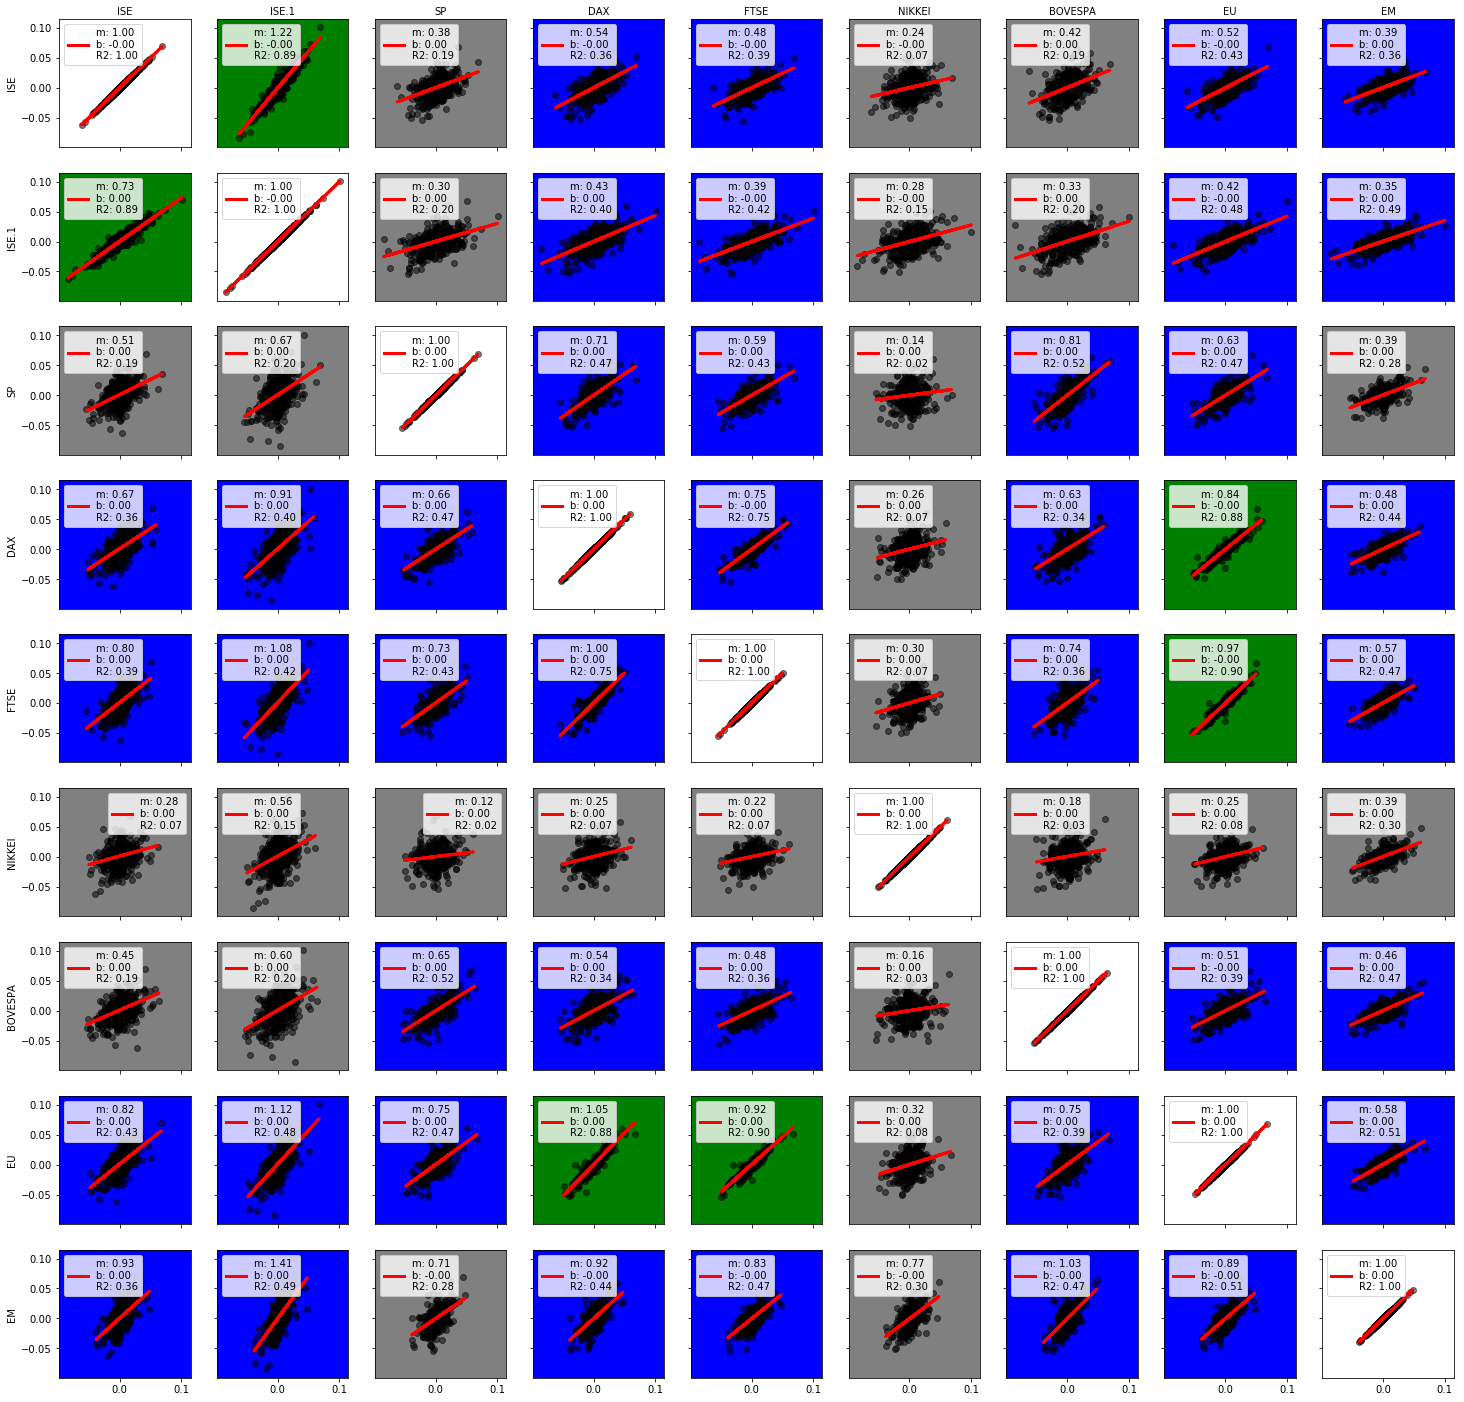

In [28]:
from utils.regresion import plot_regresions
plot_regresions(data, threshold_up=0.8, threshold_down=0.3)

# Influencia de indices sobre el ISE

Selección de variables:

In [29]:
xindex = ['SP', 'DAX', 'FTSE', 'NIKKEI', 'BOVESPA', u'EU', u'EM']
yindex = 'ISE'
X = data[xindex]
y = data[yindex]

## Minimos cuadrados ordinarios

Modelo y fit: 

In [43]:
from sklearn import linear_model
from utils.metrics import adjustedR2
reg = linear_model.LinearRegression()
reg.fit(X, y)
b = reg.intercept_
print('b:', b)
m = reg.coef_
print('m:', m)
r2 = reg.score(X, y)
print('R2:', r2)
r2_adjusted = adjustedR2(r2, len(X), len(m) + 1)
print('R2_adj: ', r2_adjusted)

b: 0.000987004024718
m: [ 0.57582465 -0.1127634  -0.03072031  0.10716408 -0.09507763 -0.02229114
 -0.04701675  0.42485429  0.03104128  0.01266022 -0.14527424  0.15554546
 -0.03051752  0.06857911]
R2: 0.482634925733
R2_adj:  0.467507291983


## Regresión ridge

Perfil de regularización:

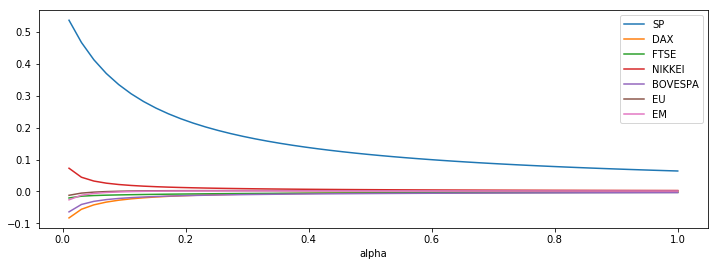

In [45]:
from utils.linear import plot_regularization
import numpy as np
plot_regularization(X, y, xindex, np.linspace(0.01, 1.0, 50), method='ridge')

## Regresión Lasso

Perfil de regularización:

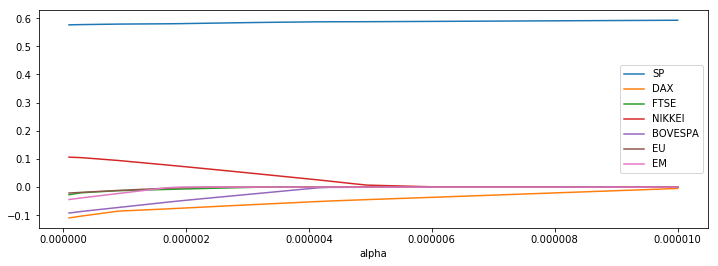

In [46]:
from utils.linear import plot_regularization
plot_regularization(X, y, xindex, np.linspace(0.0000001, 0.00001 , 50), method='lasso')

## Lasso + OLS

Selección de variables:

In [ ]:
xindex = [u'EU', u'EM']
yindex = 'ISE'
X = data[xindex]
y = data[yindex]

Modelo y fit: 

In [42]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X, y)
b = reg.intercept_
print('b:', b)
m = reg.coef_
print('m:', m)
r2 = reg.score(X, y)
print('R2:', r2)
r2_adjusted = adjustedR2(r2, len(X), len(m) + 1)
print('R2_adj: ', r2_adjusted)

b: 0.000987004024718
m: [ 0.57582465 -0.1127634  -0.03072031  0.10716408 -0.09507763 -0.02229114
 -0.04701675  0.42485429  0.03104128  0.01266022 -0.14527424  0.15554546
 -0.03051752  0.06857911]
R2: 0.482634925733
R2_adj:  0.467507291983


# Predicción de retornos: Modelo lineal

Extender la información disponible con el historial de los últimos 7 días

In [31]:
from utils.shifts import shift_data
data_shifted, shifted_cols = shift_data(data, [u'EU', u'EM'], shifts=7)

In [32]:
data_shifted[shifted_cols].head()

,EU1,EU2,EU3,EU4,EU5,EU6,EU7,EM1,EM2,EM3,EM4,EM5,EM6,EM7
date,,,,,,,,,,,,,,
2009-01-14,-0.045220,-0.012220,-0.012451,-0.010989,-0.005561,-0.017073,0.011341,-0.008677,-0.004827,-0.022630,-0.007802,-0.019424,-0.020015,0.008773
2009-01-15,-0.012070,-0.045220,-0.012220,-0.012451,-0.010989,-0.005561,-0.017073,-0.023429,-0.008677,-0.004827,-0.022630,-0.007802,-0.019424,-0.020015
2009-01-16,0.008561,-0.012070,-0.045220,-0.012220,-0.012451,-0.010989,-0.005561,0.010917,-0.023429,-0.008677,-0.004827,-0.022630,-0.007802,-0.019424
2009-01-19,-0.012045,0.008561,-0.012070,-0.045220,-0.012220,-0.012451,-0.010989,-0.004029,0.010917,-0.023429,-0.008677,-0.004827,-0.022630,-0.007802
2009-01-20,-0.015088,-0.012045,0.008561,-0.012070,-0.045220,-0.012220,-0.012451,-0.024107,-0.004029,0.010917,-0.023429,-0.008677,-0.004827,-0.022630


## OLS

In [33]:
X = data_shifted[shifted_cols].values
y = data_shifted['ISE']

In [39]:
from sklearn import linear_model
from utils.metrics import adjustedR2
reg = linear_model.LinearRegression()
reg.fit(X, y)
b = reg.intercept_
print('b:', b)
m = reg.coef_
print('m:', m)
r2 = reg.score(X, y)
print('R2:', r2)
r2_adjusted = adjustedR2(r2, len(X), len(m) + 1)
print('R2_adj: ', r2_adjusted)

b: 0.000987004024718
m: [ 0.57582465 -0.1127634  -0.03072031  0.10716408 -0.09507763 -0.02229114
 -0.04701675  0.42485429  0.03104128  0.01266022 -0.14527424  0.15554546
 -0.03051752  0.06857911]
R2: 0.482634925733
R2_adj:  0.467507291983


## Lasso + OLS

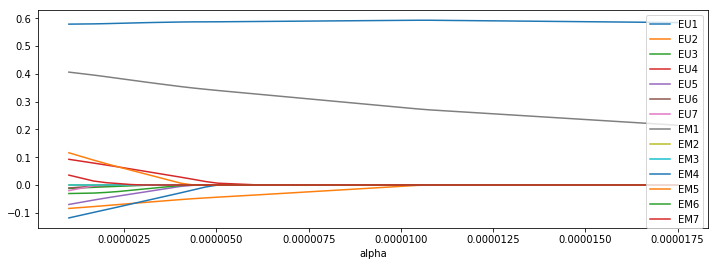

In [347]:
from utils.linear import plot_regularization
plot_regularization(X, y, shifted_cols, np.linspace(0.000001, 0.0000175, 50), method='lasso')

In [352]:
X = data_shifted[['EU1', 'EM1']].values
y = data_shifted['ISE']

In [38]:
from sklearn import linear_model
from utils.metrics import adjustedR2
reg = linear_model.LinearRegression()
reg.fit(X, y)
b = reg.intercept_
print('b:', b)
m = reg.coef_
print('m:', m)
r2 = reg.score(X, y)
print('R2:', r2)
r2_adjusted = adjustedR2(r2, len(X), len(m) + 1)
print('R2_adj: ', r2_adjusted)

b: 0.000987004024718
m: [ 0.57582465 -0.1127634  -0.03072031  0.10716408 -0.09507763 -0.02229114
 -0.04701675  0.42485429  0.03104128  0.01266022 -0.14527424  0.15554546
 -0.03051752  0.06857911]
R2: 0.482634925733
R2_adj:  0.467507291983


# Clasificación de retornos

Si se predice un retorno mayor a cierto umbral positivo, entramos en largo. Si se predice un retorno menor a cierto umbral negativo, entramos en corto